</div>


<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/CCLog.png" width=300, align="center"></a>

<h1 align=center><font size=5>Análisis de Datos con Python</font></h1>


<h1>Modulo 5: Evaluación del Modelo y Refinamiento</h1>

Hemos desarrollado modelos y hecho predicciones para los precios de los vehiculos. Ahora determinaremos que tan precisas son estas predicciones.


<h1>Indice</h1>
<ul>
    <li><a href="https://#ref1">Evaluación del Modelo </a></li>
    <li><a href="https://#ref2">Sobre ajuste, sub ajuste y Selección del Modelo </a></li>
    <li><a href="https://#ref3">Regresión de Cresta</a></li>
    <li><a href="https://#ref4">Busqueda en Rejilla</a></li>
</ul>


Este conjunto de datos fue almacenado como un objeto en IBM Cloud, haz clic <a href="https://cloud.ibm.com/registration/trial?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01">AQUI</a> para almacenar gratuitamente.


In [1]:
import pandas as pd
import numpy as np

# importar datos en limpio
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

Primero usemos unicamente datos numericos


In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Librerias para graficar


In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/home/joel/programas/anaconda3/lib/python3.9/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


<h2>Funciones para graficar</h2>


In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #datos de entrenamiento
    #datos de prueba
    # lr:  objeto de regresión lineal 
    #poly_transform:  objeto de transformación polinomial 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Parte 1: Entrenamiento y Pruebas</h1>

<p>Un paso importante para probrar el modelo es dividir los datos en dos, los de entrenamiento y los de pruebas. Se colocarán los datos objetivo <b>price</b> en un dataframe <b>y</b> por separado.</p>


In [8]:
y_data = df['price']

eliminar datos de "price" en "x data"


In [9]:
x_data=df.drop('price',axis=1)

Ahora dividimos al azar nuestros datos en los de entrenamiento y pruebas haciendo uso de la función <b>train_test_split</b>.


In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


El parametro <b>test_size</b> establece la proporción de datos que es dividida para el conjunto de pruebas. Arriba el conjunto de pruebas ha sido establecido como el 10% del total del conjunto de datos.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #1):</h1>

<b>Utilizar la función "train_test_split" para dividir el conjunto de datos tal que el 40% de las muestras seran usadas para las pruebas, establezca el parametro "random_state" igual a cero. La salida de la función debería ser de la siguiente forma:  "x_train\_1" , "x_test\_1", "y_train\_1" and  "y_test\_1". </b>

</div>


In [13]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
x_train_1,x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.4, random_state=1)
print("number of test samples :", x_test_1.shape[0])
print("number of training samples:",x_train_1.shape[0])

number of test samples : 81
number of training samples: 120


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

-->


Importemos <b>LinearRegression</b> desde el módulo <b>linear_model</b>.


In [14]:
from sklearn.linear_model import LinearRegression

Generamos un objeto de Regresión Lineal:


In [15]:
lre=LinearRegression()

Ajustamos el modelo usando la caracteristica horsepower


In [16]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculemos R^2 del conjunto de prueba:


In [17]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

Podemos observar que R^2 es mucho mas pequeño al utilizar los datos de prueba.


In [18]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #2): </h1>
<b>
Encuentre R^2 en el conjunto de pruebas usando el 90% de los datos para entrenamiento    
 </b>
</div>


In [19]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7340722810055448

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

-->


Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation.


<h2>Puntuación con Validación Cruzada</h2>


Importemos <b>model_selection</b> desde el modulo <b>cross_val_score</b>.


In [20]:
from sklearn.model_selection import cross_val_score

Introducimos el objeto, la caracteristica es en este caso 'horsepower', el dato objetivo (y_data). El parametro 'cv' determina el número de pliegues; en este caso 4.


In [21]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

La puntuación por defecto es R^2; cada elemento en el arreglo tiene el valor promedio de R^2 en el pliegue:


In [22]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Calculamos el promedio y la desviación estandar de nuestra estimación:


In [23]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


Podemos usar el error cuadrático negativo como puntuación estableciendo el parametro 'scoring' a 'neg_mean_squared_error'.


In [24]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026705, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #3): </h1>
<b> 
Calcular el promedio de R^2 usando dos pliegues, encuentre el promedio de R^2 para el segundo pliegue utilizando "horsepower" como característica:   
</b>
</div>


In [27]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
Rcross2=cross_val_score(lre,x_data[['horsepower']],y_data,cv=2)
Rcross.mean()


0.522009915042119

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

-->


Puede usar además la función 'cross_val_predict' para predecir la salida. La función divide los datos en el número especificado de pliegues utilizando uno de ellos para predecir mientras el resto son usados como datos de prueba. Importe primero la función:


In [28]:
from sklearn.model_selection import cross_val_predict

Introducimos el objeto, la característica <b>'horsepower'</b> en este caso, los datos <b>y_data</b>. El parametro 'cv' determina el número de pliegues; en este caso, 4. Generamos una salida:


In [29]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Parte 2: Sobre ajuste, sub ajuste y Selección del Modelo</h1>

<p>Al parecer los datos de prueba algunas veces referidos como los datos de ejemplo son mejores para medir que tan bien se comporta el modelo en el mundo real. Una razón para esto es el sobre ajuste; veamos algunos ejemplos. Al parecer estas diferencias son mas visibles en la Regresión Lineal Multiple y Polinomial asi que analizaremos el sobre ajuste dentro de este contexto.</p>


Generemos objetos de Regresión lineal multiple y a entrenar el modelo utilizando <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> y <b>'highway-mpg'</b> como características.


In [30]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Predicción usando datos de entrenamiento:


In [31]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

Predicción usando datos de prueba:


In [32]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

Ejecutemos alguna evaluación del modelo usando nuestros datos de entrenamiento y prueba por separado. Primero importaremos las librerias seaborn y matplotlib para graficar.


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Examinemos la distribución de los valores esperados de los datos de entrenamiento.


/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


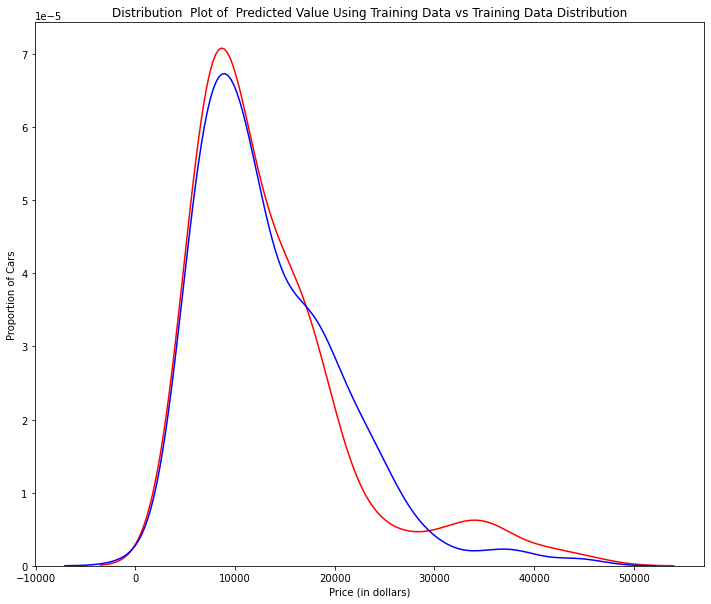

In [34]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Imagen 1: Gráfica de los valores esperados utilizando los datos de entrenamiento en comparación con los datos de entrenamiento.


Hasta ahora el modelo parece hacerlo bien con el conjunto de datos de entrenamiento. Pero ¿Que pasa cuando el modelo se encuentra con nuevos datos del conjunto de prueba? Cuando el modelo genera nuevos valores desde el conjunto de prueba podemos observar que la distribución de los valores esperados es muy diferente a los valores objetivos actuales.


/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


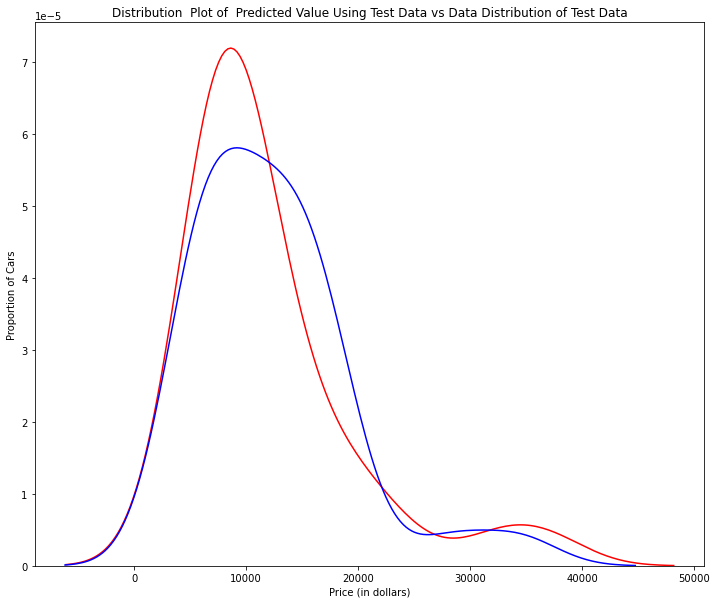

In [35]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Imagen 2: Gráfica del valor esperado utilizando los datos de prueba en comparación con los datos de prueba.


<p>Al comparar la Imagen 1 y 2 es evidente que la distribución de los datos de prueba en la imagen 1 se ajusta mucho mejor a los datos. Esta diferencia en la imagen 2 es evidente donde los rangos van desde 5000 a 15000. Aquí es donde la forma de la distribución es excepcionalmente distinta. Veamos si la regresión polinomial también muestra una caida en la precisión de la predicción cuando se analiza el conjunto de datos de prueba.</p>


In [36]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Sobre ajuste</h4>
<p>El sobre ajuste sucede cuando el modelo ajusta el ruido y no el proceso subyacente. Por lo tanto cuando se prueba el modelo con el conjunto de pruebas, este no se desempeña tan bien debido a que esta modelando el ruido y no el proceso básico que genera la relación. Generemos un modelo polinomial de quinto grado.</p>


Usemos el 55% de los datos para pruebas y el resto para entrenamiento.


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Ejecutaremos una transformación polinomial de quinto grado para la característica <b>'horse power'</b>.


In [38]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Vamos a crear un modelo de regresión lineal "poly" y a entrenarlo.


In [39]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Podemos observar la salida del modelo utilizando el método "predict" y despues asignarle los valores a "yhat".


In [40]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77547414,  7308.09791963, 12213.83954918, 18893.06169793,
       19995.73194318])

Tomemos los primeros cinco valores esperados y comparemoslos con los objetivos actuales.


In [41]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77547414  7308.09791963 12213.83954918 18893.06169793]
True values: [ 6295. 10698. 13860. 13499.]


Usaremos la función "PollyPlot" definida al principio del laboratorio para mostrar los datos de entrenamiento, los de pruebas y la función esperada.


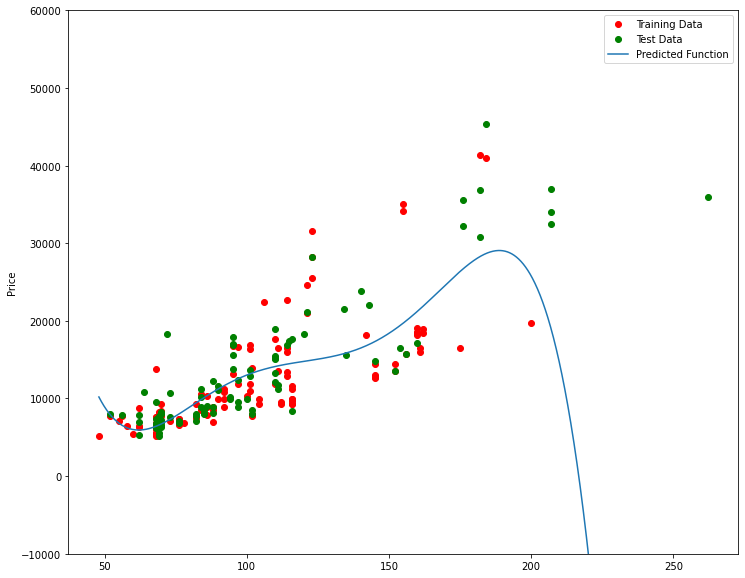

In [42]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Imagen 4: Un modelo de regresión polinomial, los puntos rojos representan datos de entrenamiento, los verdes los de pruebas y la recta azul la predicción del modelo.


Observamos que la función estimada parece tener la trayectoria de los datos pero hasta 200 "horsepower", la función empieza a desviarse de los puntos que representan los datos.


R^2 de los datos de entrenamiento:


In [43]:
poly.score(x_train_pr, y_train)

0.5567716899771691

R^2 de los datos de prueba:


In [44]:
poly.score(x_test_pr, y_test)

-29.87184147296421

Observamos que R^2 para los datos de entrenamiento es de 0.5567 mientras que para los de prueba es de -29.87. Cuanto mas bajo sea R^2 peor será el modelo, un R^2 negativo es una señal de sobre ajuste.


Veamos como cambia R^2 en los datos de prueba para polinomios de distinta magnitud y grafiquemos los resultados:


Text(3, 0.75, 'Maximum R^2 ')

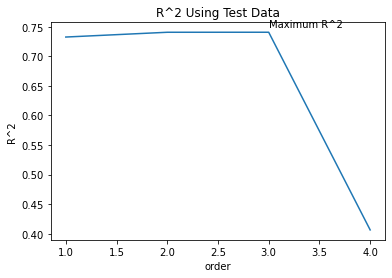

In [45]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Vemos que R^2 se incrementa gradualmente hasta que se utiliza un polinomio de tercer grado. Despues R^2 decrece dramaticamente en el de cuarto grado.


La siguiente función se usará en la próxima sección; ejecuta por favor la celda de código


In [46]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

La siguiente interfaz le permitirá experimentar con polinomios de distinto grado y cantidades de datos.


In [47]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #4a):</h1>

<b>Podemos ejecutar una transformación polinomial con mas de una característica. Genere un objeto "prl" tipo "PolynomialFeatures" de segundo grado.</b> </div>


In [48]:
prl=PolynomialFeatures(degree=2)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

pr1=PolynomialFeatures(degree=2)

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #4b): </h1>

<b> 
 Transforme las muestras de entrenamiento y pruebas para las caracteísticas 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg'. Pista: utilice el método "fit_transform".</b>
</div>


In [50]:
x_train_pr1=pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #4c): </h1>
<b> 
¿Cuantas dimensiones tiene la nueva característica? Pista: utilice el atributo "shape".    
  </b>
</div>


In [55]:
x_train_pr1.shape

(110, 70)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

There are now 15 features: x_train_pr1.shape 

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #4d): </h1>

<b> 
Genere un modelo de regresión lineal "ply1" y entrene el objeto con el método "fit" usando características polinomiales.
</b>
</div>


In [57]:
ply1=LinearRegression()
ply1.fit(x_train_pr1,y_train)

LinearRegression()

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)

-->


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #4e): </h1>
<b>Utilice el método "predict" para predecir la salida de las características polinomiales, despues use la función "DistributionPlot" para mostrar la distribución de la salida esperada contra los datos de prueba.
    </b>
</div>


/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


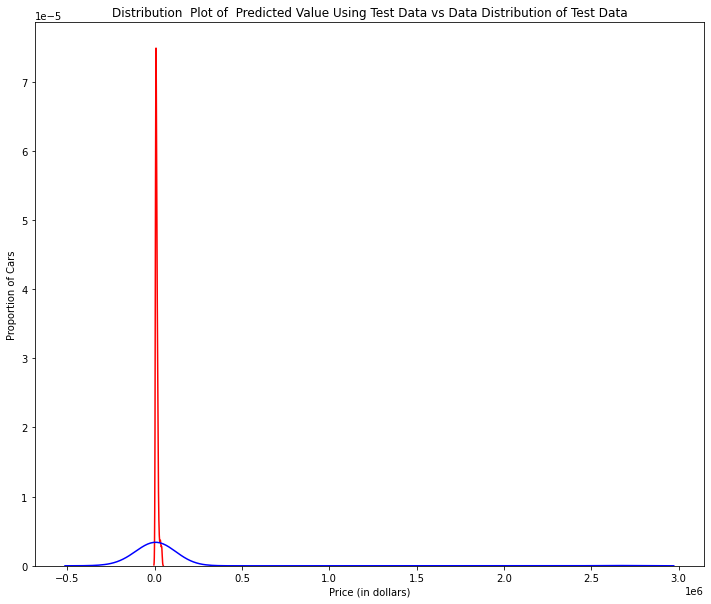

In [60]:
yhat_test1=ply1.predict(x_test_pr1)
Title:'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_train,yhat_test1,"Actual Values (Test)","Predicted Values (Test)",Title)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #4f): </h1>

<b>Utilice la gráfica de distribución para determinar las dos regiones donde los precios esperados son menos precisos que los precios actuales.</b>

</div>


/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/joel/programas/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


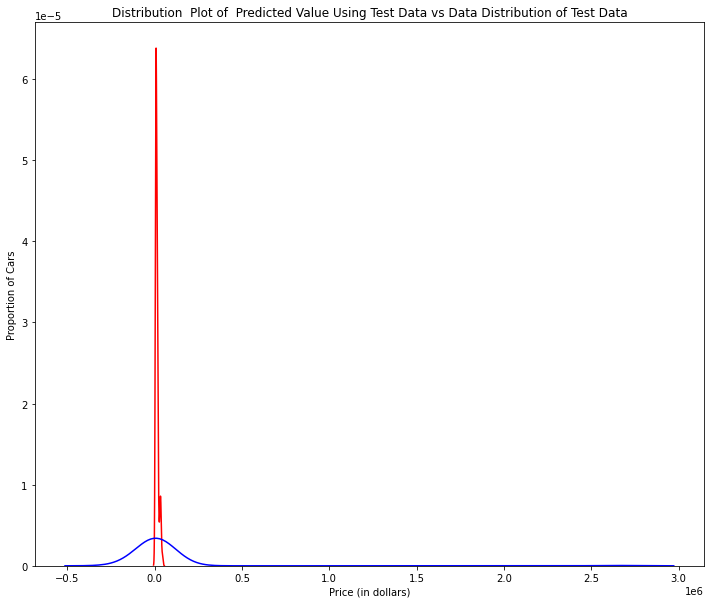

In [59]:
DistributionPlot(y_test,yhat_test1,"Actual Values (Test)","Predicted Values (Test)",Title)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

The predicted value is lower than actual value for cars where the price  $ 10,000 range, conversely the predicted price is larger than the price cost in the $30, 000 to $40,000 range. As such the model is not as accurate in these ranges .
    
-->

<img src = "https://ibm.box.com/shared/static/c35ipv9zeanu7ynsnppb8gjo2re5ugeg.png" width = 700, align = "center">


<h2 id="ref3">Parte 3: Regresión de Cresta</h2> 


En esta sección revisaremos la regresión de cresta y como el parametro Alfa modifica el modelo. Como observación, nuestros datos de prueba seran usados como datos de validación.


Realicemos una transformación polinomial de segundo grado en nuestros datos.


In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Importemos <b>Ridge</b> desde el módulo <b>linear models</b>.


In [ ]:
from sklearn.linear_model import Ridge

Generemos un objeto de tipo regresión de cresta, establezca el parametro de regularización a 0.1


In [ ]:
RigeModel=Ridge(alpha=0.1)

Al igual que la regresión lineal, se puede ajustar el modelo con el método <b>fit</b>.


In [ ]:
RigeModel.fit(x_train_pr, y_train)

De igual forma se puede obtener una predicción:


In [ ]:
yhat = RigeModel.predict(x_test_pr)

Comparemos las primeras cinco muestras esperadas con nuestor conjunto de pruebas.


In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

Seleccionamos el valor de Alfa que minimiza el error de prueba, por ejemplo, podemos utilizar un ciclo for.


In [ ]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Podemos graficar el valor de R^2 para distintas Alphas.


In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Imagen 6: La recta azul representa a R^2 de los datos de prueba y la recta roja al R^2 de los datos de entrenamiento. El eje x representa los distintos valores de Alfa.


La recta roja en la imagen 6 representa a R^2 de los datos de pruebas, al incrementarse Alpha R^2 disminuye; por lo tanto mientras Alfa aumenta el modelo se comporta de peor forma en los datos de prueba. La recta azul representa la R^2 en los datos de validación, mientras el valor de Alfa aumenta el de R^2 disminuye.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #5): </h1>

Haga un regresión de cresta y calcule el R^2 usando las características polinomiales, utilice los datos de entrenamiento para entrenar el modelo y datos de prueba para probarlo. El parametro alpha debe establecerse en 10.

  </div>


In [ ]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

RigeModel = Ridge(alpha=0) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

-->


<h2 id="ref4">Parte 4: Busqueda en Rejilla</h2>


El termino Alfa es un hiperparametro, sklearn tiene la clase <b>GridSearchCV</b> para hacer el proceso de encontrar el mejor hiperparametro mas facil.


Importemos <b>GridSearchCV</b> desde el módulo <b>model_selection</b>.


In [ ]:
from sklearn.model_selection import GridSearchCV

Creamos un diccionario de valores de parametros.


In [ ]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

Creamos un objeto de regiones de cresta:


In [ ]:
RR=Ridge()
RR

Creamos un objeto de busqeda de rejilla de cresta:


In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Ajustamos el modelo


In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

El objeto encuentra los mejores valores de parametro en los datos de validación. Podemos obtener el estimador con los mejor parametros y asignarlo a la variable BestRR de la siguiente manera:


In [ ]:
BestRR=Grid1.best_estimator_
BestRR

Probamos ahora nuestro modelo en los datos de prueba


In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #6): </h1>
Ejecutamos una busqueda de rejilla para el parámetro alfa y el de normalización, despues encuentre el mejor valor para los parámetros.
 </div>


In [ ]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

-->


<h1>Gracias por terminar este cuaderno</h1>


<div class="alert alert-block alert-info" style="margin-top: 20px">

```
<p><a href="https://cocl.us/corsera_da0101en_notebook_bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/BottomAd.png" width="750" align="center"></a></p>
```

</div>


<h3>Acerca de los Autores:</h3>

Este cuaderno fue escrito por <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan y <a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01" target="_blank">Fiorella Wenver</a> y <a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01" target="_blank">Joseph Santarcangelo</a> es un Cientifico de Datos en IBM que posee un Doctorado en Ingeniería Electrica. Su investigación se enfoca en el uso de Aprendizaje Automático, Procesamiento de Señales y Visión Artificial para determinar el impacto de los videos en la cognición. Joseph ha trabajado para IBM desde el término de su doctorado.
</p>


<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01">MIT License</a>.</p>


In [1]:
import io
from IPython.nbformat import current

filepath = "review-introduction.ipynb"

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

/usr/local/lib/python3.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/usr/local/lib/python3.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


2102
